# Combine multiple same label images

In [1]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import matplotlib.pyplot as plt

![combining 2 images](https://techblog.cdiscount.com/assets/images/DataScience/feedback_kaggle/1st_img_better_480.png)  
![combining 4 images](https://techblog.cdiscount.com/assets/images/DataScience/feedback_kaggle/differents_envs.png)  
![combining 3 images](https://techblog.cdiscount.com/assets/images/DataScience/feedback_kaggle/differents_angles.png)

In [2]:
!mkdir ./shopee_augmented_data 
!mkdir ./shopee_augmented_data/train_images
!cp -r ../input/shopee-product-matching/test_images ./shopee_augmented_data/test_images

In [3]:
original_train_df = pd.read_csv('../input/shopee-product-matching/train.csv')

# 重複数が4の倍数になるようにデータを増やす
original_train_df = original_train_df.copy()
value_count_dict ={}
for count, label in zip(original_train_df['label_group'].value_counts().to_list(), original_train_df['label_group'].value_counts().index.to_list()):
    value_count_dict[label]=count     
    
original_train_df['label_count'] = original_train_df['label_group']
original_train_df['label_count'].replace(value_count_dict, inplace=True)
original_train_df = original_train_df[original_train_df['label_count']>3]
display(original_train_df.head())
display(original_train_df.shape)


for label in original_train_df['label_group'].unique():
    if original_train_df[original_train_df['label_group']==label].shape[0] % 4 == 1:
        original_train_df = pd.concat([original_train_df, original_train_df[original_train_df['label_group']==label][:3]], axis=0)
    elif original_train_df[original_train_df['label_group']==label].shape[0] % 4 == 2:
        original_train_df = pd.concat([original_train_df, original_train_df[original_train_df['label_group']==label][:2]], axis=0)
    elif original_train_df[original_train_df['label_group']==label].shape[0] % 4 == 3:
        original_train_df = pd.concat([original_train_df, original_train_df[original_train_df['label_group']==label][:1]], axis=0)    

# 以下は2,3枚のときとだいたい同じ

train_df = original_train_df.copy()
value_count_dict ={}
for count, label in zip(train_df['label_group'].value_counts().to_list(), train_df['label_group'].value_counts().index.to_list()):
    value_count_dict[label]=count     
    
train_df['label_count'] = train_df['label_group']
train_df['label_count'].replace(value_count_dict, inplace=True)
display(train_df.head())

train_df['image'] = train_df['label_group'].map(lambda x: 'simple_multiple_combined_'+str(x)+'.jpg')
train_df['posting_id'] = train_df['posting_id'].map(lambda x: 'posting_id')
train_df['image_phash'] = train_df['image_phash'].map(lambda x: 'image_phash')
train_df['title'] = train_df['title'].map(lambda x: 'title')

train_df2 = train_df.copy()
train_df2['image'] = train_df2['label_group'].map(lambda x: 'processed_multiple_combined_'+str(x)+'.jpg')
train_df2['posting_id'] = train_df2['posting_id'].map(lambda x: 'posting_id')
train_df2['image_phash'] = train_df2['image_phash'].map(lambda x: 'image_phash')
train_df2['title'] = train_df2['title'].map(lambda x: 'title')

print('train_df')
display(train_df.head())
print('train_df2')
display(train_df2.head())

train_output_df = pd.concat([train_df, train_df2], axis=0)
train_output_df = train_output_df.drop_duplicates()

for image, label, count in zip(train_output_df['image'].to_list(), train_output_df['label_group'].to_list(), train_output_df['label_count'].to_list()):
    add_num = int(count / 4) - 1
    if add_num > 0:
        for i in range(add_num):
            train_output_df = train_output_df.append({'posting_id':'posting_id', 'image':str(i+1)+'-'+image, 'image_phash':'image_phash', 'title':'title', 'label_group':label, 'label_count':count}, ignore_index=True)
train_output_df['image'] = train_output_df['image'].map(lambda x: '0-' + x if '-' not in x else x)
train_output_df = train_output_df.drop('label_count', axis=1)
display(train_output_df.shape)
display(train_output_df[train_output_df['label_group']==3627744656])
train_output_df.to_csv('./shopee_augmented_data/train.csv', index=False)

posting_id                                 image       image_phash  \
6   train_1802986387  00144a49c56599d45354a1c28104c039.jpg  f815c9bb833ab4c8   
15  train_4196427721  002039aaf8618627a0442d5e89e5dda6.jpg  e98c873acc65946e   
19  train_2961381387  00303ad1c062fdeaf5f41b9ffb71a5fb.jpg  e48d9b652098efe1   
22  train_1396146683  0035b8fc42955c0fa2301b68e2ffe861.jpg  d5c0caa0aeb3b23e   
24  train_1872347548  003906c6c6bba4cde15e5e854dba8f6d.jpg  f3e18c5ea14493e3   

                                                title  label_group  \
6                            Jubah anak size 1-12 thn   1835033137   
15  Korek Kuping LED untuk balita CherryBabyKidsSh...    349297863   
19               Madame Gie MakeUp Blush On BY GISELL   2098400894   
22  CHOCO BALL LAGIE COKLAT Lagie Grosir Cokelat L...   4240123481   
24  Stand Hanger Multifungsi - Tiang Gantungan Baj...   4044205497   

    label_count  
6             7  
15            8  
19            5  
22           11  
24            7

(14955, 6)

posting_id                                 image       image_phash  \
6   train_1802986387  00144a49c56599d45354a1c28104c039.jpg  f815c9bb833ab4c8   
15  train_4196427721  002039aaf8618627a0442d5e89e5dda6.jpg  e98c873acc65946e   
19  train_2961381387  00303ad1c062fdeaf5f41b9ffb71a5fb.jpg  e48d9b652098efe1   
22  train_1396146683  0035b8fc42955c0fa2301b68e2ffe861.jpg  d5c0caa0aeb3b23e   
24  train_1872347548  003906c6c6bba4cde15e5e854dba8f6d.jpg  f3e18c5ea14493e3   

                                                title  label_group  \
6                            Jubah anak size 1-12 thn   1835033137   
15  Korek Kuping LED untuk balita CherryBabyKidsSh...    349297863   
19               Madame Gie MakeUp Blush On BY GISELL   2098400894   
22  CHOCO BALL LAGIE COKLAT Lagie Grosir Cokelat L...   4240123481   
24  Stand Hanger Multifungsi - Tiang Gantungan Baj...   4044205497   

    label_count  
6             8  
15            8  
19            8  
22           12  
24            8

train_df


posting_id                                    image  image_phash  title  \
6   posting_id  simple_multiple_combined_1835033137.jpg  image_phash  title   
15  posting_id   simple_multiple_combined_349297863.jpg  image_phash  title   
19  posting_id  simple_multiple_combined_2098400894.jpg  image_phash  title   
22  posting_id  simple_multiple_combined_4240123481.jpg  image_phash  title   
24  posting_id  simple_multiple_combined_4044205497.jpg  image_phash  title   

    label_group  label_count  
6    1835033137            8  
15    349297863            8  
19   2098400894            8  
22   4240123481           12  
24   4044205497            8

train_df2


posting_id                                       image  image_phash  \
6   posting_id  processed_multiple_combined_1835033137.jpg  image_phash   
15  posting_id   processed_multiple_combined_349297863.jpg  image_phash   
19  posting_id  processed_multiple_combined_2098400894.jpg  image_phash   
22  posting_id  processed_multiple_combined_4240123481.jpg  image_phash   
24  posting_id  processed_multiple_combined_4044205497.jpg  image_phash   

    title  label_group  label_count  
6   title   1835033137            8  
15  title    349297863            8  
19  title   2098400894            8  
22  title   4240123481           12  
24  title   4044205497            8

(8878, 5)

posting_id                                          image  image_phash  \
118   posting_id      0-simple_multiple_combined_3627744656.jpg  image_phash   
2374  posting_id   0-processed_multiple_combined_3627744656.jpg  image_phash   
4720  posting_id      1-simple_multiple_combined_3627744656.jpg  image_phash   
4721  posting_id      2-simple_multiple_combined_3627744656.jpg  image_phash   
4722  posting_id      3-simple_multiple_combined_3627744656.jpg  image_phash   
4723  posting_id      4-simple_multiple_combined_3627744656.jpg  image_phash   
4724  posting_id      5-simple_multiple_combined_3627744656.jpg  image_phash   
4725  posting_id      6-simple_multiple_combined_3627744656.jpg  image_phash   
4726  posting_id      7-simple_multiple_combined_3627744656.jpg  image_phash   
4727  posting_id      8-simple_multiple_combined_3627744656.jpg  image_phash   
4728  posting_id      9-simple_multiple_combined_3627744656.jpg  image_phash   
4729  posting_id     10-simple_multiple_combined_3627744656.jpg  image_phash   
4730  posting_id     11-simple_multiple_combined_3627744656.jpg  image_phash   
4731  posting_id     12-simple_multiple_combined_3627744656.jpg  image_phash   
6903  posting_id   1-processed_multiple_combined_3627744656.jpg  image_phash   
6904  posting_id   2-processed_multiple_combined_3627744656.jpg  image_phash   
6905  posting_id   3-processed_multiple_combined_3627744656.jpg  image_phash   
6906  posting_id   4-processed_multiple_combined_3627744656.jpg  image_phash   
6907  posting_id   5-processed_multiple_combined_3627744656.jpg  image_phash   
6908  posting_id   6-processed_multiple_combined_3627744656.jpg  image_phash   
6909  posting_id   7-processed_multiple_combined_3627744656.jpg  image_phash   
6910  posting_id   8-processed_multiple_combined_3627744656.jpg  image_phash   
6911  posting_id   9-processed_multiple_combined_3627744656.jpg  image_phash   
6912  posting_id  10-processed_multiple_combined_3627744656.jpg  image_phash   
6913  posting_id  11-processed_multiple_combined_3627744656.jpg  image_phash   
6914  posting_id  12-processed_multiple_combined_3627744656.jpg  image_phash   

      title  label_group  
118   title   3627744656  
2374  title   3627744656  
4720  title   3627744656  
4721  title   3627744656  
4722  title   3627744656  
4723  title   3627744656  
4724  title   3627744656  
4725  title   3627744656  
4726  title   3627744656  
4727  title   3627744656  
4728  title   3627744656  
4729  title   3627744656  
4730  title   3627744656  
4731  title   3627744656  
6903  title   3627744656  
6904  title   3627744656  
6905  title   3627744656  
6906  title   3627744656  
6907  title   3627744656  
6908  title   3627744656  
6909  title   3627744656  
6910  title   3627744656  
6911  title   3627744656  
6912  title   3627744656  
6913  title   3627744656  
6914  title   3627744656

In [4]:
test_df = pd.read_csv('../input/shopee-product-matching/test.csv')
test_df.to_csv('./shopee_augmented_data/test.csv', index=False)

In [5]:
datagen = ImageDataGenerator(
           rotation_range=20,
           width_shift_range=0.2,
           height_shift_range=0.2,
           #shear_range=0.2,
           zoom_range=0.2,
           horizontal_flip=True,
           vertical_flip=False,
           fill_mode='nearest')

def simple_augment(img_name, train=True):
    input_path = '../input/shopee-product-matching/train_images/'+img_name if train else '../input/shopee-product-matching/test_images/'+img_name
    img = keras.preprocessing.image.load_img(input_path)
    x = keras.preprocessing.image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    
    g = datagen.flow(x, batch_size=1)
    g = np.squeeze(g[0])
    img = keras.preprocessing.image.array_to_img(g, scale=True)
    return img


def get_2img_concat_h_resize(im1, im2, resample=Image.BICUBIC, resize_big_image=True):
    if im1.height == im2.height:
        _im1 = im1
        _im2 = im2
    elif (((im1.height > im2.height) and resize_big_image) or
          ((im1.height < im2.height) and not resize_big_image)):
        _im1 = im1.resize((int(im1.width * im2.height / im1.height), im2.height), resample=resample)
        _im2 = im2
    else:
        _im1 = im1
        _im2 = im2.resize((int(im2.width * im1.height / im2.height), im1.height), resample=resample)
    dst = Image.new('RGB', (_im1.width + _im2.width, _im1.height))
    dst.paste(_im1, (0, 0))
    dst.paste(_im2, (_im1.width, 0))
    return dst


def get_2img_concat_v_resize(im1, im2, resample=Image.BICUBIC, resize_big_image=True):
    if im1.width == im2.width:
        _im1 = im1
        _im2 = im2
    elif (((im1.width > im2.width) and resize_big_image) or
          ((im1.width < im2.width) and not resize_big_image)):
        _im1 = im1.resize((im2.width, int(im1.height * im2.width / im1.width)), resample=resample)
        _im2 = im2
    else:
        _im1 = im1
        _im2 = im2.resize((im1.width, int(im2.height * im1.width / im2.width)), resample=resample)
    dst = Image.new('RGB', (_im1.width, _im1.height + _im2.height))
    dst.paste(_im1, (0, 0))
    dst.paste(_im2, (0, _im1.height))
    return dst

In [6]:
def split_list(l, n):
    """
    リストをサブリストに分割する
    :param l: リスト
    :param n: サブリストの要素数
    :return: 
    """
    for idx in range(0, len(l), n):
        yield l[idx:idx + n]

# train:単に連結
for label in tqdm(train_df['label_group'].unique()):
    img_names = original_train_df[original_train_df['label_group']==label]['image'].to_list()
    img_names_list = split_list(img_names, 4)
    for i, img_names in enumerate(img_names_list):
        img_name1 = img_names[0]
        img_name2 = img_names[1]
        img1 = keras.preprocessing.image.load_img('../input/shopee-product-matching/train_images/'+img_name1)
        img2 = keras.preprocessing.image.load_img('../input/shopee-product-matching/train_images/'+img_name2)
        img12 = get_2img_concat_h_resize(img1, img2)
        
        img_name3 = img_names[2]
        img_name4 = img_names[3]
        img3 = keras.preprocessing.image.load_img('../input/shopee-product-matching/train_images/'+img_name3)
        img4 = keras.preprocessing.image.load_img('../input/shopee-product-matching/train_images/'+img_name4)
        img34 = get_2img_concat_h_resize(img3, img4)
        
        img1234 = get_2img_concat_v_resize(img12, img34).save('./shopee_augmented_data/train_images/'+f'{i}-simple_multiple_combined_'+str(label)+'.jpg')
        

# train:加工後連結
for label in tqdm(train_df2['label_group'].unique()):
    img_names = original_train_df[original_train_df['label_group']==label]['image'].to_list()
    img_names_list = split_list(img_names, 4)
    for i, img_names in enumerate(img_names_list):
        img_name1 = img_names[0]
        img_name2 = img_names[1]
        img1 = simple_augment(img_name1, train=True)
        img2 = simple_augment(img_name2, train=True)
        img12 = get_2img_concat_h_resize(img1, img2)
        
        img_name3 = img_names[2]
        img_name4 = img_names[3]
        img3 = simple_augment(img_name3, train=True)
        img4 = simple_augment(img_name4, train=True)
        img34 = get_2img_concat_h_resize(img3, img4)
        
        img1234 = get_2img_concat_v_resize(img12, img34).save('./shopee_augmented_data/train_images/'+f'{i}-processed_multiple_combined_'+str(label)+'.jpg')

100%|██████████| 2256/2256 [51:07<00:00,  1.36s/it]


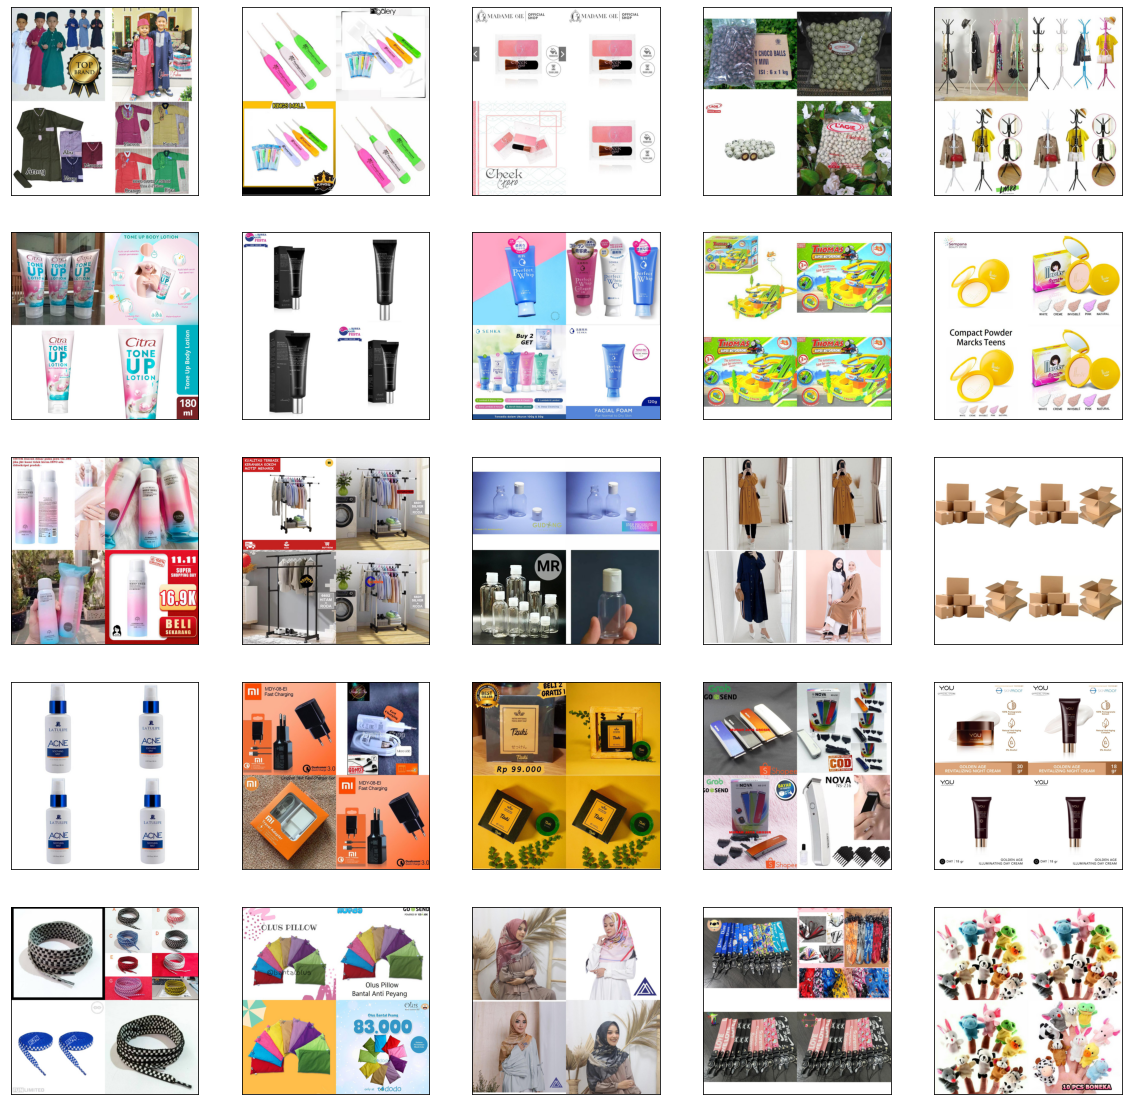

In [7]:
# 出力画像を表示してみる
n_data = 25 # 表示するデータ数
row=5 # 行数
col=5 # 列数
fig, ax = plt.subplots(nrows=row, ncols=col,figsize=(20,20))

for i, img_name in enumerate(train_output_df['image'].to_list()[:25]):
    filename = './shopee_augmented_data/train_images/'+img_name
    img = Image.open(filename, 'r')  # 画像読み込み
    _r= i//col
    _c= i%col
    ax[_r,_c].axes.xaxis.set_visible(False) # X軸を非表示に
    ax[_r,_c].axes.yaxis.set_visible(False) # Y軸を非表示に
    ax[_r,_c].imshow(np.array(img))

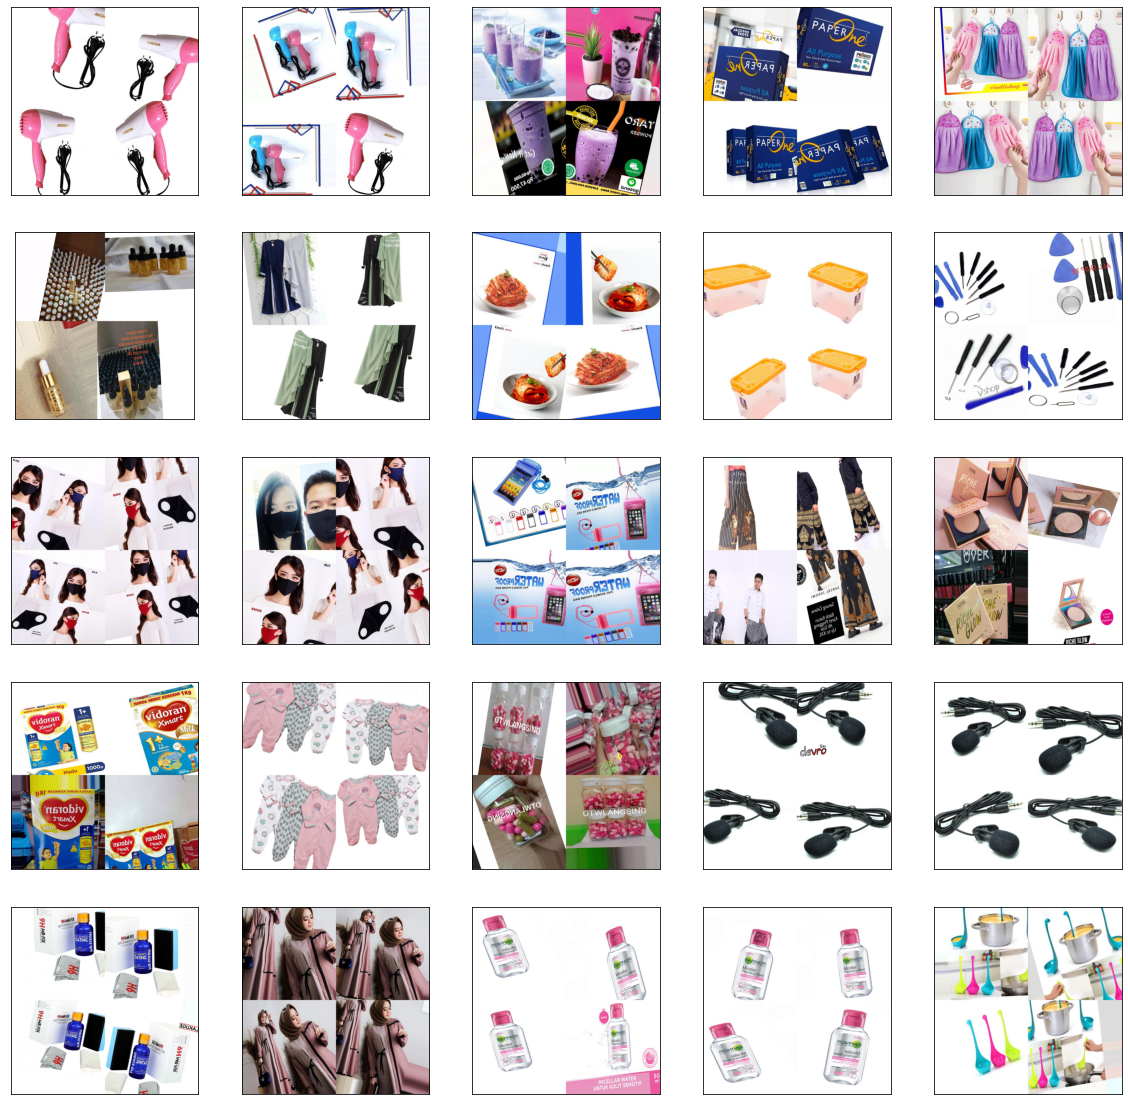

In [8]:
# 出力画像を表示してみる
n_data = 25 # 表示するデータ数
row=5 # 行数
col=5 # 列数
fig, ax = plt.subplots(nrows=row, ncols=col,figsize=(20,20))

for i, img_name in enumerate(train_output_df['image'].to_list()[-25:]):
    filename = './shopee_augmented_data/train_images/'+img_name
    img = Image.open(filename, 'r')  # 画像読み込み
    _r= i//col
    _c= i%col
    ax[_r,_c].axes.xaxis.set_visible(False) # X軸を非表示に
    ax[_r,_c].axes.yaxis.set_visible(False) # Y軸を非表示に
    ax[_r,_c].imshow(np.array(img))

In [9]:
!zip -r shopee_augmented_data.zip shopee_augmented_data
!rm -rf shopee_augmented_data

  adding: shopee_augmented_data/ (stored 0%)
  adding: shopee_augmented_data/train_images/ (stored 0%)
  adding: shopee_augmented_data/train_images/3-simple_multiple_combined_1091404026.jpg (deflated 3%)
  adding: shopee_augmented_data/train_images/0-processed_multiple_combined_3753501224.jpg (deflated 17%)
  adding: shopee_augmented_data/train_images/1-processed_multiple_combined_2014211844.jpg (deflated 8%)
  adding: shopee_augmented_data/train_images/6-processed_multiple_combined_562358068.jpg (deflated 19%)
  adding: shopee_augmented_data/train_images/0-processed_multiple_combined_97801740.jpg (deflated 8%)
  adding: shopee_augmented_data/train_images/0-processed_multiple_combined_3133575067.jpg (deflated 14%)
  adding: shopee_augmented_data/train_images/1-processed_multiple_combined_642283221.jpg (deflated 3%)
  adding: shopee_augmented_data/train_images/1-simple_multiple_combined_2028238738.jpg (deflated 7%)
  adding: shopee_augmented_data/train_images/0-processed_multiple_combin